# SimEx VSL

Simulator...
x list [2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900, 2900]
Running sumo simulator
 Retrying in 1 seconds
Step #5400.00 (4ms ~= 62.50*RT, ~61500.00UPS, TraCI: 0ms, vehicles TOT 5999 ACT 246 BUF 0)tep #1125.00 (4ms ~= 62.50*RT, ~64250.00UPS, TraCI: 0ms, vehicles TOT 1081 ACT 257 BUF 0)ep #2250.00 (4ms ~= 62.50*RT, ~72500.00UPS, TraCI: 1ms, vehicles TOT 2425 ACT 290 BUF 0)p #3375.00 (6ms ~= 41.67*RT, ~49166.67UPS, TraCI: 1ms, vehicles TOT 3833 ACT 295 BUF 0) #4500.00 (4ms ~= 62.50*RT, ~62500.00UP

Step #5400.00 (6ms ~= 41.67*RT, ~72333.33UPS, TraCI: 0ms, vehicles TOT 7259 ACT 434 BUF 0)
x list [3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800]
Running sumo simulator
 Retrying in 1 seconds
Step #3350.00 (6ms ~= 41.67*RT, ~106833.33UPS, TraCI: 0ms, vehicles TOT 4639 ACT 641 BUF 0tep #1125.00 (5ms ~= 50.00*RT, ~67800.00UPS, TraCI: 0ms, vehicles TOT 1363 ACT 339 BUF 0)ep #2250.00 (6ms ~= 41.67*RT, ~78666.67UPS, TraCI: 0ms, vehicles TOT 2988 ACT 472 BUF 0)

Step #5400.00 (5ms ~= 50.00*RT, ~86600.00UPS, TraCI: 0ms, vehicles TOT 7349 ACT 433 BUF 0)
MAIN modx [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[1, 6.25]]


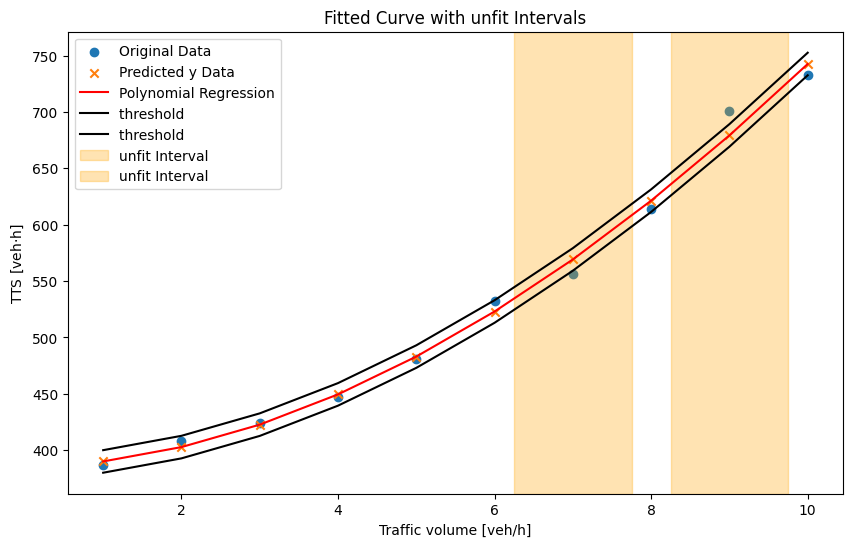

MAIN interval list from VAL: [[6.25, 7.75], [8.25, 9.75]]


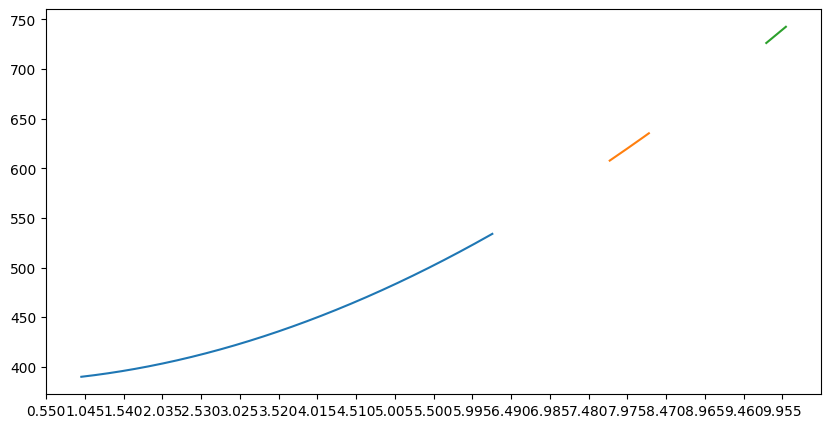

In [1]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
        
import datetime

validator_controller_vsl = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True

# SUMO vsl
from controller_modifier_scenarios import Controller

# SUMO vsl generate modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
modlist = Controller.get_list_of_modifiers(10)
# print(f"Mod list: {modlist}")
# mod_x_list = modlist

# Calls Simulator
# Input: list of ids and modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
# Output: IDs,SIMULATED(values) [[1,388.88],[2,420.22]]
# USE the sumo_simulator_vsl or sumo_simulator_novsl function such as components['sumo_simulator_novsl']
mod_x,sim_y_list = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_vsl_old'])
assert len(mod_x) == len(sim_y_list)

print("MAIN modx", mod_x)

# Calls Validator controller
intervals_list_vsl =  validator_controller_vsl.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[1, 10])
print("MAIN interval list from VAL:", intervals_list_vsl)

filename1 = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
save_object(validator_controller_vsl,f"vc_vsl-{filename1}.pkl")


# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)

Modifier...
[MODC]: intervals list:  [[2500, 4000]]
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4000)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
[MODC]: mod_x:  [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]
MAIN mod outcome ([[2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]], [[2500, 4000]])
Simulator...
[[2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 36

Step #4825.00 (6ms ~= 41.67*RT, ~89333.33UPS, TraCI: 0ms, vehicles TOT 6479 ACT 536 BUF 0)

Step #5400.00 (5ms ~= 50.00*RT, ~79400.00UPS, TraCI: 1ms, vehicles TOT 7169 ACT 397 BUF 0)
x list [3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3781.5384615384614, 3

Step #4325.00 (7ms ~= 35.71*RT, ~99428.57UPS, TraCI: 1ms, vehicles TOT 6005 ACT 696 BUF 0)

Step #5400.00 (6ms ~= 41.67*RT, ~72666.67UPS, TraCI: 1ms, vehicles TOT 7349 ACT 436 BUF 0)
x list [3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0, 3900.0]
Running sumo simulator
 Retrying in 1 seconds
ep #1125.00 (5ms ~= 50.00*RT, ~73200.00UPS, TraCI: 0ms, vehicles TOT 1400 ACT 366 BUF 0)ep #2250.00 (6ms ~= 41.67*RT, ~88166.67UPS, Tra

Step #4275.00 (7ms ~= 35.71*RT, ~99142.86UPS, TraCI: 0ms, vehicles TOT 6082 ACT 694 BUF 0)

Step #5400.00 (6ms ~= 41.67*RT, ~76500.00UPS, TraCI: 0ms, vehicles TOT 7529 ACT 459 BUF 0)
MODX [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0] and sim_y_list [346.1388888888888, 361.94444444444434, 372.5, 395.5555555555556, 400.5138888888888, 415.4722222222221, 429.7361111111112, 454.18055555555554, 503.1249999999999, 546.1249999999998, 584.8194444444443, 678.402777777778, 730.6944444444441, 784.5833333333333]
MAIN modx [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[2500, 2788.076923

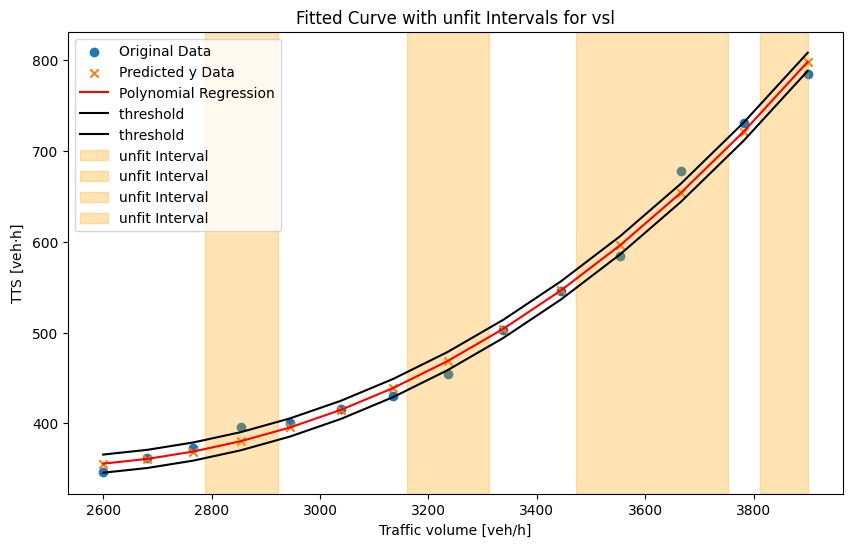

MAIN interval list from VAL: [[2788.076923076923, 2921.923076923077], [3160.3846153846152, 3312.6923076923076], [3471.923076923077, 3752.6923076923076], [3811.153846153846, 3900.0]]
Modifier...
[MODC]: intervals list:  [[2788.076923076923, 2921.923076923077], [3160.3846153846152, 3312.6923076923076], [3471.923076923077, 3752.6923076923076], [3811.153846153846, 3900.0]]
[MODC]: (interval_min_tick, interval_max_tick):  (2788.076923076923, 2921.923076923077)
[MODC]: mod_ticks:  [2800, 2875]
[MODC]: mod_x:  [2800.0, 2875.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3160.3846153846152, 3312.6923076923076)
[MODC]: mod_ticks:  [3175, 3250]
[MODC]: mod_x:  [3175.0, 3250.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3471.923076923077, 3752.6923076923076)
[MODC]: mod_ticks:  [3475, 3550, 3625, 3700]
[MODC]: mod_x:  [3475.0, 3548.4320557491287, 3623.4320557491287, 3700.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3811.153846153846, 3900.0)
[MODC]: mod_ticks:  [3850]
[MODC]:

Step #5400.00 (6ms ~= 41.67*RT, ~72166.67UPS, TraCI: 1ms, vehicles TOT 7259 ACT 433 BUF 0)
x list [3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850, 3850]
Running sumo simulator
 Retrying in 1 seconds
ep #1125.00 (5ms ~= 50.00*RT, ~70200.00UPS, TraCI: 0ms, vehicles TOT 1381 ACT 351 BUF 0)ep #2250.00 (6ms ~= 41.67*RT, ~85666.67UPS, TraCI: 0ms, vehicles TOT 3025 ACT 514 BUF 0)p #3375.00 (7ms ~= 35.71*RT, ~105000.00UPS, TraCI: 0ms, vehicles TOT 4733 ACT 735 BUF 0

Step #5400.00 (5ms ~= 50.00*RT, ~88000.00UPS, TraCI: 0ms, vehicles TOT 7439 ACT 440 BUF 0)
MODX [2800.0, 2875.0, 3175.0, 3250.0, 3475.0, 3548.4320557491287, 3623.4320557491287, 3700.0, 3850] and sim_y_list [378.2777777777777, 390.90277777777777, 437.3611111111109, 451.2916666666669, 542.2083333333336, 608.7638888888887, 629.5138888888888, 699.5972222222224, 776.7499999999999]
MAIN modx [2800.0, 2875.0, 3175.0, 3250.0, 3475.0, 3548.4320557491287, 3623.4320557491287, 3700.0, 3850]
Validator...
What are POINTS  [[2800.0, 378.2777777777777], [2875.0, 390.90277777777777], [3175.0, 437.3611111111109], [3250.0, 451.2916666666669], [3475.0, 542.2083333333336], [3548.4320557491287, 608.7638888888887], [3623.4320557491287, 629.5138888888888], [3700.0, 699.5972222222224], [3850.0, 776.7499999999999], [2853.846153846154, 395.5555555555556], [3235.3846153846152, 454.18055555555554], [3553.846153846154, 584.8194444444443], [3666.153846153846, 678.402777777778], [3900.0, 784.5833333333333]]
       **

/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


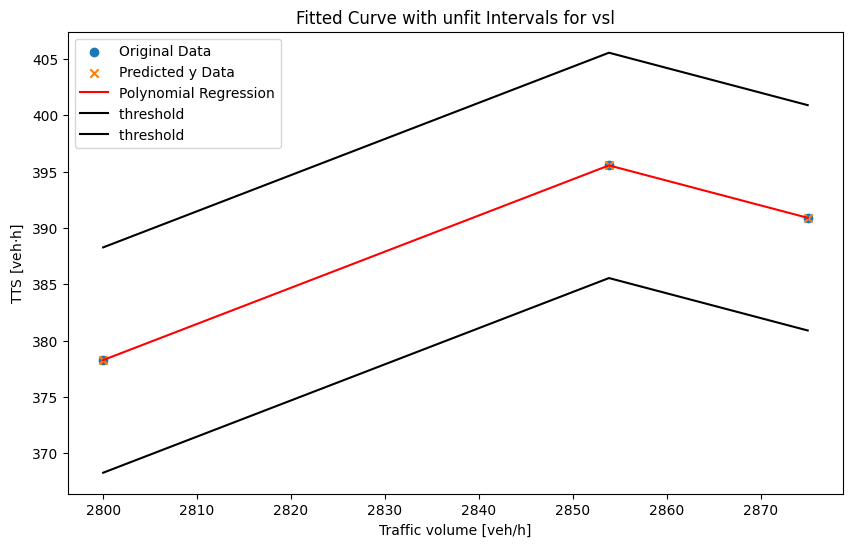

equation,
 y =  -1.3122899093893992e-17x^6  -1.2770545898277334e-16x^5 + 6.358086644578345e-11x^4 + 2.4285497450838745e-07x^3 + 0.0005247904533349774x^2 + 0.04548092502199785x^1  -6756.838058283177 
unfit_points
 [(2800.0, 378.2777777777777), (2853.846153846154, 395.5555555555556), (2875.0, 390.90277777777777)] 
local_unfit_interval
, [[2788.076923076923, 2921.923076923077]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


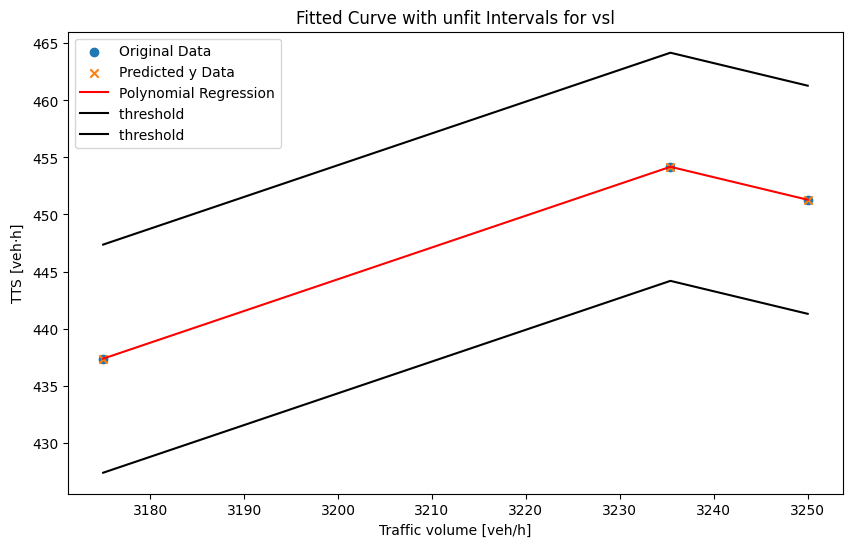

equation,
 y =  -7.021032226907145e-18x^6  -7.140211944457212e-17x^5 + 4.363711091787378e-11x^4 + 1.8871352740889447e-07x^3 + 0.0004618382862811587x^2 + 0.04585380379012988x^1  -7622.901581324841 
unfit_points
 [(3175.0, 437.3611111111109), (3235.3846153846152, 454.18055555555554), (3250.0, 451.2916666666669)] 
local_unfit_interval
, [[3160.3846153846152, 3312.6923076923076]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3471.923076923077, 3493.358013937282]]


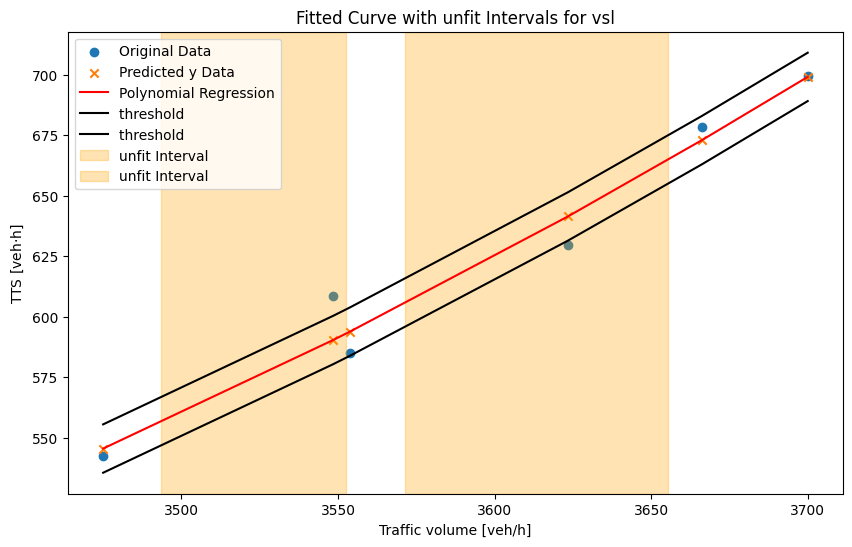

equation,
 y =  0.0004752718081351916x^2  -2.7270576953938677x^1 + 4282.807676732228 
unfit_points
 [(3475.0, 542.2083333333336), (3548.4320557491287, 608.7638888888887), (3553.846153846154, 584.8194444444443), (3623.4320557491287, 629.5138888888888), (3666.153846153846, 678.402777777778), (3700.0, 699.5972222222224)] 
local_unfit_interval
, [[3471.923076923077, 3493.358013937282], [3552.4926293218978, 3571.2426293218978], [3655.473398552667, 3752.6923076923076]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


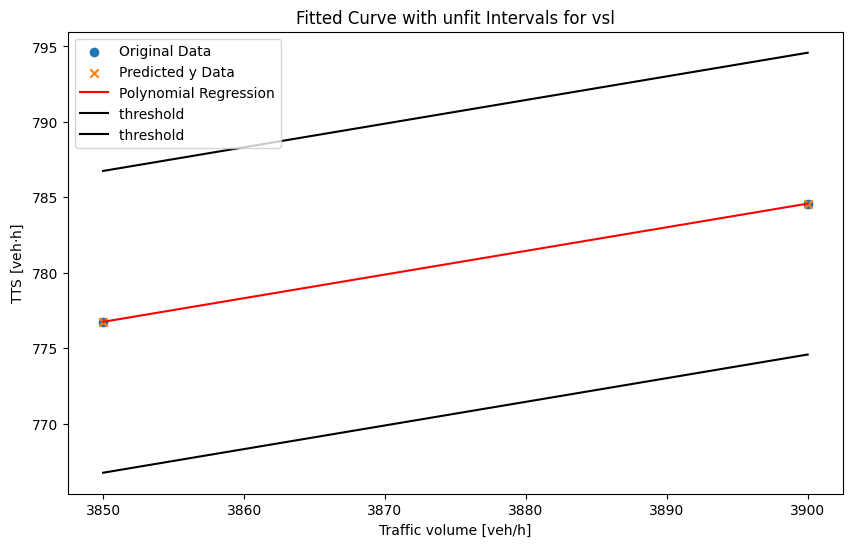

equation,
 y =  1.1550005915503804e-05x^2 + 0.06715412082150923x^1 + 347.0066721546345 
unfit_points
 [(3850.0, 776.7499999999999), (3900.0, 784.5833333333333)] 
local_unfit_interval
, [[3811.153846153846, 3900.0]]
DIFFERENCES 
each_interval  [3811.153846153846, 3900.0] 
new_unfit_interval   []
MAIN interval list from VAL: [[3493.358013937282, 3552.4926293218978], [3571.2426293218978, 3655.473398552667]]
Modifier...
[MODC]: intervals list:  [[3493.358013937282, 3552.4926293218978], [3571.2426293218978, 3655.473398552667]]
[MODC]: (interval_min_tick, interval_max_tick):  (3493.358013937282, 3552.4926293218978)
[MODC]: mod_ticks:  [3500, 3550]
[MODC]: mod_x:  [3500.0, 3550.0]
[MODC]: (interval_min_tick, interval_max_tick):  (3571.2426293218978, 3655.473398552667)
[MODC]: mod_ticks:  [3600, 3650]
[MODC]: mod_x:  [3600.0, 3650.0]
MAIN mod outcome ([[3500.0, 3550.0], [3600.0, 3650.0]], [[3493.358013937282, 3552.4926293218978], [3571.2426293218978, 3655.473398552667]])
Simulator...
[[3500.0,

/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


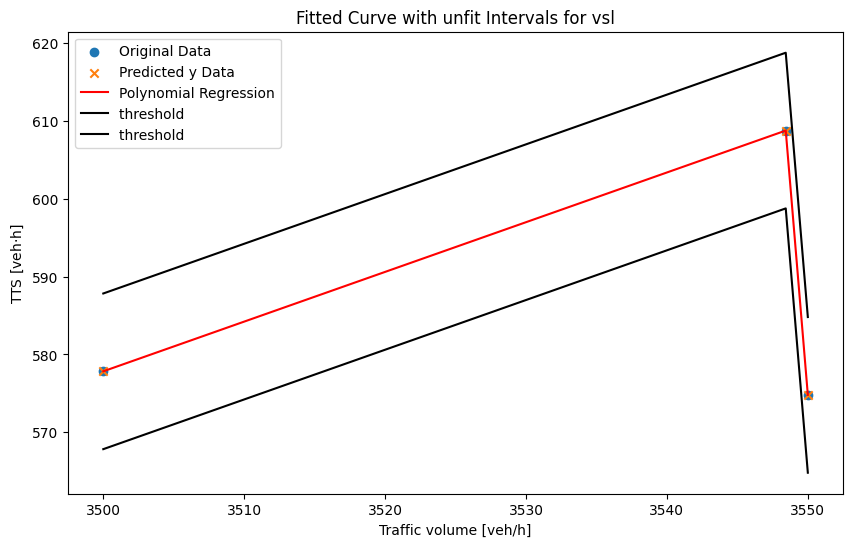

equation,
 y =  -3.381299000520596e-16x^6  -4.15941958752999e-15x^5 + 2.515538867909722e-09x^4 + 1.1890573990621497e-05x^3 + 0.031609716234489604x^2 + 0.6446297130552282x^1  -652436.628541582 
unfit_points
 [(3500.0, 577.8333333333333), (3548.4320557491287, 608.7638888888887), (3550.0, 574.8055555555557)] 
local_unfit_interval
, [[3493.358013937282, 3552.4926293218978]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:42: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


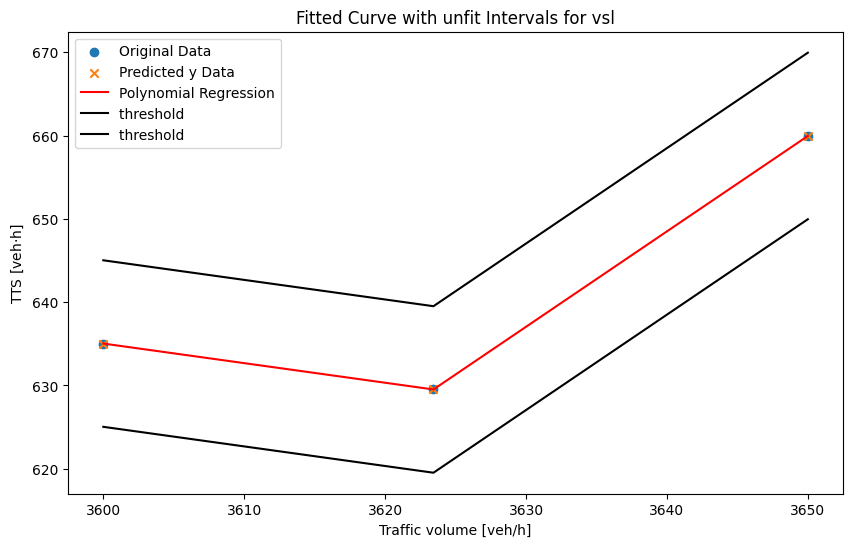

equation,
 y =  1.8937978439531954e-17x^6 + 1.5841647389871849e-16x^5  -1.4853582395035138e-10x^4  -7.188404526824007e-07x^3  -0.001952948630603583x^2 + 0.025703146284924212x^1 + 43019.60018150133 
unfit_points
 [(3600.0, 635.0277777777777), (3623.4320557491287, 629.5138888888888), (3650.0, 659.9583333333333)] 
local_unfit_interval
, [[3571.2426293218978, 3655.473398552667]]
DIFFERENCES 
each_interval  [3571.2426293218978, 3655.473398552667] 
new_unfit_interval   []
MAIN interval list from VAL: []


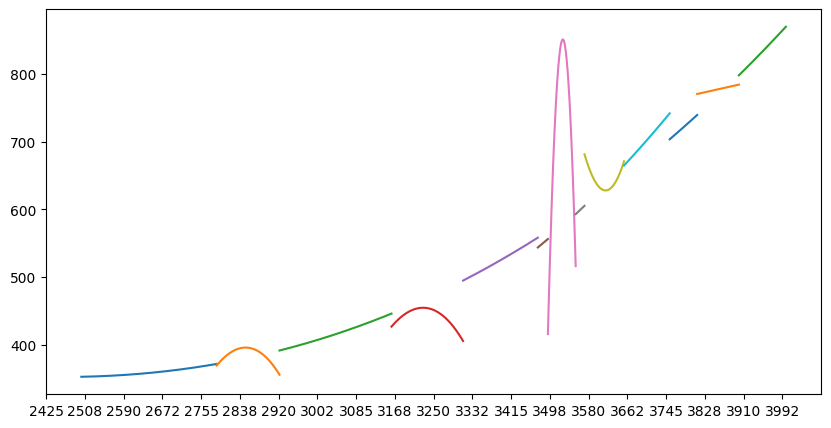

In [1]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

import pickle
import datetime
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

validator_controller_vsl = ValidatorController("vsl")
logger = Logger()
logger_main_arguments = {}
is_main_func = True
# Initialize interval list for the first iteration
intervals_list=[[mds['domain_min_interval'], mds['domain_max_interval']]]
#intervals_list=[[2900, 3200]]
# Timestamp for the validator pickle file
count = 0
filename1 = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

while is_main_func:
    
    # Calls Modifier Controller
    mod_outcome = ModifierController.control(intervals_list=intervals_list,selected_modifier=components['modifierA'], do_plot=simexSettings['do_plot'])
    mod_x_list = mod_outcome[0]
    checked_intervals = mod_outcome[1]
    print("MAIN mod outcome", mod_outcome)  

    
    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger_main_arguments['remaining_unfit_intervals'] = checked_intervals
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = SimulatorController.simulate(mod_x_list,selected_simulator=components['sumo_simulator_vsl'])
    print(f"MODX {mod_x} and sim_y_list {sim_y_list}")
    assert len(mod_x) == len(sim_y_list)

    print("MAIN modx", mod_x)  

    # Calls Validator controller
    intervals_list =  validator_controller_vsl.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[mds["domain_min_interval"], mds["domain_max_interval"]])
    print("MAIN interval list from VAL:", intervals_list)
    # Loop number ( Loop-1,Loop-2..etc)
    count +=1
    save_object(validator_controller_vsl,f"vc_vsl_loop-{count}-{filename1}.pkl")
    
    # Updates interval_list to new range output from validator controller
    # No more unfit intervals -> write MAIN log
    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)

# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)
